In [8]:
from keras.models import load_model,Sequential
from keras.layers import Input, Dense, LSTM,Dropout
from keras.utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint


import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.metrics import confusion_matrix

def signal_to_catagorical(data):
  data.loc[data['Signal'] == 'wait ot hold', 'Signal'] = 'wait or hold'
  data.loc[data['Signal'] == 'buy', 'Signal'] = 0
  data.loc[data['Signal'] == 'sell', 'Signal'] = 1 
  data.loc[data['Signal'] == 'wait or hold', 'Signal'] = 2 
  return data

def add_shift_day(data,day):
  r_list = []
  for i in range(day,len(data)):#Number mean day to shift
    r_list.append(data[i-day : i])
  return np.array(r_list)



In [9]:
datalist = [f for f in glob.glob("../../Dataset/*.csv")]
print('have stock = ',len(datalist))


have stock =  76


In [10]:
data = pd.read_csv(datalist[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3023 non-null   object 
 1   High            3023 non-null   float64
 2   Low             3023 non-null   float64
 3   Open            3023 non-null   float64
 4   Close           3023 non-null   float64
 5   Volume          3023 non-null   int64  
 6   Adj Close       3023 non-null   float64
 7   Signal          3023 non-null   object 
 8   MACD-1          3023 non-null   float64
 9   SIGNAL LINE1    3023 non-null   float64
 10  MACD-2          3023 non-null   float64
 11  SIGNAL LINE2    3023 non-null   float64
 12  plusDI          3023 non-null   float64
 13  minusDI         3023 non-null   float64
 14  adx             3023 non-null   float64
 15  storsi          3023 non-null   float64
 16  %K              3023 non-null   float64
 17  %D              3023 non-null   f

In [11]:
#validation 
val_list = []
for val_name in range(71,74):
    df = pd.read_csv(datalist[val_name])
    val_x = df
    # val_x = add_shift_day(val_x,30)
    val_list.append(val_x)

#test
test_list = []
for test_name in range(74,76):
    df = pd.read_csv(datalist[test_name])
    test = df
    # test = add_shift_day(test,30)
    test_list.append(test)

In [16]:
model = Sequential()
model.add(LSTM(100, input_shape=((30,7)),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

checkpoint = ModelCheckpoint('lstm_model_trend5.h5',
                               verbose=1,
                               monitor='val_acc',
                               mode='max',
                               save_best_only = True)



Epoch 1/2000
77/77 [==============================] - 4s 50ms/step - loss: 1.0774 - acc: 0.4384
Epoch 2/2000
77/77 [==============================] - 4s 53ms/step - loss: 1.0371 - acc: 0.4632
Epoch 3/2000
77/77 [==============================] - 4s 52ms/step - loss: 1.0122 - acc: 0.4697
Epoch 4/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.9926 - acc: 0.4664
Epoch 5/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.9777 - acc: 0.4652
Epoch 6/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.9606 - acc: 0.4689
Epoch 7/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.9518 - acc: 0.4713
Epoch 8/2000
77/77 [==============================] - 5s 64ms/step - loss: 0.9402 - acc: 0.4843
Epoch 9/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.9346 - acc: 0.4839
Epoch 10/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.9278 - acc: 0.4860
Epoch 11/2000
77/77 [==================

77/77 [==============================] - 4s 47ms/step - loss: 0.1304 - acc: 0.9496
Epoch 85/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.1969 - acc: 0.9362
Epoch 86/2000
77/77 [==============================] - 4s 51ms/step - loss: 0.1486 - acc: 0.9402
Epoch 87/2000
77/77 [==============================] - 5s 60ms/step - loss: 0.1112 - acc: 0.9622
Epoch 88/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0990 - acc: 0.9683
Epoch 89/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0963 - acc: 0.9650
Epoch 90/2000
77/77 [==============================] - 5s 67ms/step - loss: 0.0950 - acc: 0.9658
Epoch 91/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0900 - acc: 0.9695
Epoch 92/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0899 - acc: 0.9654
Epoch 93/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0984 - acc: 0.9638
Epoch 94/2000
77/77 [=======================

77/77 [==============================] - 5s 65ms/step - loss: 0.0487 - acc: 0.9866
Epoch 168/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0522 - acc: 0.9850
Epoch 169/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0508 - acc: 0.9821
Epoch 170/2000
77/77 [==============================] - 5s 67ms/step - loss: 0.0507 - acc: 0.9833: 0s - loss: 0.0501 - acc: 0.9
Epoch 171/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0462 - acc: 0.9817
Epoch 172/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0440 - acc: 0.9866
Epoch 173/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0460 - acc: 0.9821
Epoch 174/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0453 - acc: 0.9833
Epoch 175/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0453 - acc: 0.9841
Epoch 176/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0510 - acc: 0.9801: 1s -

77/77 [==============================] - 4s 47ms/step - loss: 0.0254 - acc: 0.9902
Epoch 250/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0304 - acc: 0.9886
Epoch 251/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0330 - acc: 0.9886
Epoch 252/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0344 - acc: 0.9882
Epoch 253/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0287 - acc: 0.9906
Epoch 254/2000
77/77 [==============================] - 5s 64ms/step - loss: 0.0265 - acc: 0.9911
Epoch 255/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0243 - acc: 0.9927
Epoch 256/2000
77/77 [==============================] - 4s 46ms/step - loss: 0.0289 - acc: 0.9898
Epoch 257/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0353 - acc: 0.9882
Epoch 258/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0412 - acc: 0.9850
Epoch 259/2000
77/77 [=============

77/77 [==============================] - 4s 56ms/step - loss: 0.0510 - acc: 0.9805
Epoch 333/2000
77/77 [==============================] - 6s 74ms/step - loss: 0.0473 - acc: 0.9825
Epoch 334/2000
77/77 [==============================] - 4s 57ms/step - loss: 0.0264 - acc: 0.9906
Epoch 335/2000
77/77 [==============================] - 4s 56ms/step - loss: 0.0241 - acc: 0.9935
Epoch 336/2000
77/77 [==============================] - 6s 74ms/step - loss: 0.0196 - acc: 0.9951
Epoch 337/2000
77/77 [==============================] - 4s 57ms/step - loss: 0.0182 - acc: 0.9951: 3s - ETA
Epoch 338/2000
77/77 [==============================] - 4s 57ms/step - loss: 0.0184 - acc: 0.9935
Epoch 339/2000
77/77 [==============================] - 6s 76ms/step - loss: 0.0159 - acc: 0.9959
Epoch 340/2000
77/77 [==============================] - 4s 56ms/step - loss: 0.0147 - acc: 0.9955
Epoch 341/2000
77/77 [==============================] - 5s 66ms/step - loss: 0.0110 - acc: 0.9967
Epoch 342/2000
77/77 [===

Epoch 413/2000
77/77 [==============================] - 4s 56ms/step - loss: 0.0092 - acc: 0.9972
Epoch 414/2000
77/77 [==============================] - 4s 56ms/step - loss: 0.0141 - acc: 0.9955
Epoch 415/2000
77/77 [==============================] - 6s 74ms/step - loss: 0.0165 - acc: 0.9951
Epoch 416/2000
77/77 [==============================] - 4s 56ms/step - loss: 0.0257 - acc: 0.9911
Epoch 417/2000
77/77 [==============================] - 4s 56ms/step - loss: 0.0254 - acc: 0.9915
Epoch 418/2000
77/77 [==============================] - 6s 75ms/step - loss: 0.0590 - acc: 0.9797: 0s - loss: 0.0590 - acc: 0.979
Epoch 419/2000
77/77 [==============================] - 4s 56ms/step - loss: 0.1502 - acc: 0.9630
Epoch 420/2000
77/77 [==============================] - 4s 58ms/step - loss: 0.2878 - acc: 0.9215
Epoch 421/2000
77/77 [==============================] - 6s 75ms/step - loss: 0.2770 - acc: 0.9183
Epoch 422/2000
77/77 [==============================] - 4s 57ms/step - loss: 0.1157 - 

77/77 [==============================] - 4s 47ms/step - loss: 0.0211 - acc: 0.9931
Epoch 496/2000
77/77 [==============================] - 5s 67ms/step - loss: 0.0174 - acc: 0.9947
Epoch 497/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0122 - acc: 0.9959
Epoch 498/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0079 - acc: 0.9984
Epoch 499/2000
77/77 [==============================] - 5s 68ms/step - loss: 0.0091 - acc: 0.9963
Epoch 500/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0077 - acc: 0.9980
Epoch 501/2000
77/77 [==============================] - 4s 51ms/step - loss: 0.0052 - acc: 0.9992
Epoch 502/2000
77/77 [==============================] - 5s 69ms/step - loss: 0.0061 - acc: 0.9984
Epoch 503/2000
77/77 [==============================] - 4s 50ms/step - loss: 0.0072 - acc: 0.9988
Epoch 504/2000
77/77 [==============================] - 5s 67ms/step - loss: 0.0061 - acc: 0.9984
Epoch 505/2000
77/77 [=============

77/77 [==============================] - 4s 47ms/step - loss: 0.0052 - acc: 0.9980
Epoch 578/2000
77/77 [==============================] - 4s 50ms/step - loss: 0.0070 - acc: 0.9967
Epoch 579/2000
77/77 [==============================] - 5s 61ms/step - loss: 0.0103 - acc: 0.9980
Epoch 580/2000
77/77 [==============================] - 4s 56ms/step - loss: 0.0104 - acc: 0.9984
Epoch 581/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0123 - acc: 0.9967
Epoch 582/2000
77/77 [==============================] - 4s 53ms/step - loss: 0.0143 - acc: 0.9963
Epoch 583/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0121 - acc: 0.9980
Epoch 584/2000
77/77 [==============================] - 5s 59ms/step - loss: 0.0067 - acc: 0.9972
Epoch 585/2000
77/77 [==============================] - 5s 68ms/step - loss: 0.0044 - acc: 0.9992
Epoch 586/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0055 - acc: 0.9984
Epoch 587/2000
77/77 [=============

77/77 [==============================] - 5s 67ms/step - loss: 0.0074 - acc: 0.9976
Epoch 661/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0137 - acc: 0.9955
Epoch 662/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0118 - acc: 0.9955
Epoch 663/2000
77/77 [==============================] - 5s 69ms/step - loss: 0.0119 - acc: 0.9959
Epoch 664/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0115 - acc: 0.9963
Epoch 665/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0117 - acc: 0.9967
Epoch 666/2000
77/77 [==============================] - 4s 52ms/step - loss: 0.0182 - acc: 0.9947
Epoch 667/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0353 - acc: 0.9894
Epoch 668/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0513 - acc: 0.9862
Epoch 669/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0611 - acc: 0.9825
Epoch 670/2000
77/77 [=============

77/77 [==============================] - 4s 48ms/step - loss: 0.0061 - acc: 0.9988
Epoch 744/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0051 - acc: 0.9992
Epoch 745/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0090 - acc: 0.9980
Epoch 746/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0043 - acc: 0.9996
Epoch 747/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0055 - acc: 0.9988
Epoch 748/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0035 - acc: 1.0000
Epoch 749/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0039 - acc: 0.9992
Epoch 750/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0043 - acc: 0.9988
Epoch 751/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0042 - acc: 0.9992
Epoch 752/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0051 - acc: 0.9988
Epoch 753/2000
77/77 [=============

77/77 [==============================] - 4s 49ms/step - loss: 0.0050 - acc: 0.9984
Epoch 827/2000
77/77 [==============================] - 5s 66ms/step - loss: 0.0029 - acc: 0.9992
Epoch 828/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0049 - acc: 0.9984
Epoch 829/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0061 - acc: 0.9984
Epoch 830/2000
77/77 [==============================] - 4s 56ms/step - loss: 0.0041 - acc: 0.9980
Epoch 831/2000
77/77 [==============================] - 4s 58ms/step - loss: 0.0035 - acc: 0.9988
Epoch 832/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0042 - acc: 0.9996
Epoch 833/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0026 - acc: 0.9992
Epoch 834/2000
77/77 [==============================] - 5s 67ms/step - loss: 0.0038 - acc: 0.9992
Epoch 835/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0036 - acc: 0.9988
Epoch 836/2000
77/77 [=============

77/77 [==============================] - 5s 64ms/step - loss: 0.0025 - acc: 0.9996
Epoch 910/2000
77/77 [==============================] - 4s 53ms/step - loss: 0.0022 - acc: 1.0000
Epoch 911/2000
77/77 [==============================] - 4s 51ms/step - loss: 0.0017 - acc: 1.0000
Epoch 912/2000
77/77 [==============================] - 5s 64ms/step - loss: 0.0021 - acc: 0.9996
Epoch 913/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0034 - acc: 0.9988
Epoch 914/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0028 - acc: 0.9992
Epoch 915/2000
77/77 [==============================] - 5s 66ms/step - loss: 0.0091 - acc: 0.9984
Epoch 916/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0126 - acc: 0.9972
Epoch 917/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0161 - acc: 0.9951
Epoch 918/2000
77/77 [==============================] - 5s 66ms/step - loss: 0.0089 - acc: 0.9976
Epoch 919/2000
77/77 [=============

77/77 [==============================] - 4s 49ms/step - loss: 0.0057 - acc: 0.9992
Epoch 993/2000
77/77 [==============================] - 5s 64ms/step - loss: 0.0018 - acc: 1.0000
Epoch 994/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0030 - acc: 0.9992
Epoch 995/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0026 - acc: 0.9996
Epoch 996/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0031 - acc: 0.9984
Epoch 997/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0048 - acc: 0.9984
Epoch 998/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0019 - acc: 0.9996
Epoch 999/2000
77/77 [==============================] - 5s 66ms/step - loss: 0.0069 - acc: 0.9984
Epoch 1000/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0041 - acc: 0.9984
Epoch 1001/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0054 - acc: 0.9984
Epoch 1002/2000
77/77 [==========

77/77 [==============================] - 4s 49ms/step - loss: 0.0034 - acc: 0.9984
Epoch 1075/2000
77/77 [==============================] - 5s 68ms/step - loss: 0.0047 - acc: 0.9992
Epoch 1076/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0035 - acc: 0.9996
Epoch 1077/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0037 - acc: 0.9992
Epoch 1078/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0034 - acc: 0.9992
Epoch 1079/2000
77/77 [==============================] - 4s 50ms/step - loss: 9.4481e-04 - acc: 1.0000
Epoch 1080/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0041 - acc: 0.9988
Epoch 1081/2000
77/77 [==============================] - 5s 62ms/step - loss: 0.0199 - acc: 0.9963
Epoch 1082/2000
77/77 [==============================] - 4s 51ms/step - loss: 0.0124 - acc: 0.9955
Epoch 1083/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0768 - acc: 0.9805
Epoch 1084/2000
77/77 

77/77 [==============================] - 5s 66ms/step - loss: 0.0050 - acc: 0.9988
Epoch 1157/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0050 - acc: 0.9988
Epoch 1158/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0037 - acc: 0.9988
Epoch 1159/2000
77/77 [==============================] - 5s 67ms/step - loss: 0.0075 - acc: 0.9988
Epoch 1160/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0027 - acc: 1.0000
Epoch 1161/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0036 - acc: 0.9984
Epoch 1162/2000
77/77 [==============================] - 4s 58ms/step - loss: 0.0032 - acc: 0.9992
Epoch 1163/2000
77/77 [==============================] - 4s 58ms/step - loss: 0.0046 - acc: 0.9992
Epoch 1164/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0020 - acc: 1.0000
Epoch 1165/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0014 - acc: 1.0000
Epoch 1166/2000
77/77 [===

77/77 [==============================] - 5s 67ms/step - loss: 0.0015 - acc: 0.9996
Epoch 1239/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0024 - acc: 0.9984
Epoch 1240/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0052 - acc: 0.9984
Epoch 1241/2000
77/77 [==============================] - 4s 52ms/step - loss: 0.0109 - acc: 0.9967
Epoch 1242/2000
77/77 [==============================] - 5s 62ms/step - loss: 0.0094 - acc: 0.9976
Epoch 1243/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0061 - acc: 0.9980
Epoch 1244/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0039 - acc: 0.9992
Epoch 1245/2000
77/77 [==============================] - 5s 67ms/step - loss: 0.0037 - acc: 0.9988
Epoch 1246/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0059 - acc: 0.9988
Epoch 1247/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0110 - acc: 0.9976
Epoch 1248/2000
77/77 [===

77/77 [==============================] - 4s 49ms/step - loss: 0.0065 - acc: 0.9988
Epoch 1321/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0093 - acc: 0.9980
Epoch 1322/2000
77/77 [==============================] - 5s 66ms/step - loss: 0.0056 - acc: 0.9988
Epoch 1323/2000
77/77 [==============================] - 5s 59ms/step - loss: 0.0069 - acc: 0.9992
Epoch 1324/2000
77/77 [==============================] - 4s 55ms/step - loss: 0.0037 - acc: 0.9988
Epoch 1325/2000
77/77 [==============================] - 5s 70ms/step - loss: 0.0020 - acc: 0.9996
Epoch 1326/2000
77/77 [==============================] - 4s 51ms/step - loss: 0.0019 - acc: 1.0000
Epoch 1327/2000
77/77 [==============================] - 5s 62ms/step - loss: 0.0014 - acc: 1.0000
Epoch 1328/2000
77/77 [==============================] - 4s 55ms/step - loss: 0.0012 - acc: 1.0000
Epoch 1329/2000
77/77 [==============================] - 4s 58ms/step - loss: 6.9266e-04 - acc: 1.0000: 1s - loss: 6
Epoch 13

77/77 [==============================] - 4s 47ms/step - loss: 0.0186 - acc: 0.9931
Epoch 1402/2000
77/77 [==============================] - 4s 58ms/step - loss: 0.0177 - acc: 0.9951: 0s - loss: 0
Epoch 1403/2000
77/77 [==============================] - 4s 52ms/step - loss: 0.0073 - acc: 0.9980
Epoch 1404/2000
77/77 [==============================] - 4s 50ms/step - loss: 0.0020 - acc: 1.0000
Epoch 1405/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0023 - acc: 0.9996
Epoch 1406/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0013 - acc: 1.0000
Epoch 1407/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0013 - acc: 1.0000
Epoch 1408/2000
77/77 [==============================] - 4s 57ms/step - loss: 0.0023 - acc: 0.9992
Epoch 1409/2000
77/77 [==============================] - 4s 55ms/step - loss: 0.0034 - acc: 0.9992
Epoch 1410/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0015 - acc: 1.0000
Epoch 1411/2

77/77 [==============================] - 4s 47ms/step - loss: 0.0337 - acc: 0.9878
Epoch 1483/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0456 - acc: 0.9919
Epoch 1484/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0207 - acc: 0.9935
Epoch 1485/2000
77/77 [==============================] - 5s 66ms/step - loss: 0.0098 - acc: 0.9963
Epoch 1486/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0030 - acc: 1.0000
Epoch 1487/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0036 - acc: 0.9988
Epoch 1488/2000
77/77 [==============================] - 5s 66ms/step - loss: 0.0013 - acc: 1.0000
Epoch 1489/2000
77/77 [==============================] - 4s 49ms/step - loss: 0.0012 - acc: 1.0000
Epoch 1490/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0030 - acc: 0.9996
Epoch 1491/2000
77/77 [==============================] - 5s 60ms/step - loss: 0.0022 - acc: 0.9992
Epoch 1492/2000
77/77 [===

77/77 [==============================] - 4s 52ms/step - loss: 4.2978e-04 - acc: 1.0000
Epoch 1565/2000
77/77 [==============================] - 4s 57ms/step - loss: 4.2285e-04 - acc: 1.0000
Epoch 1566/2000
77/77 [==============================] - 4s 47ms/step - loss: 7.0272e-04 - acc: 1.0000
Epoch 1567/2000
77/77 [==============================] - 5s 61ms/step - loss: 4.9641e-04 - acc: 1.0000
Epoch 1568/2000
77/77 [==============================] - 4s 51ms/step - loss: 4.9188e-04 - acc: 1.0000
Epoch 1569/2000
77/77 [==============================] - 4s 47ms/step - loss: 4.3736e-04 - acc: 1.0000
Epoch 1570/2000
77/77 [==============================] - 4s 47ms/step - loss: 3.0208e-04 - acc: 1.0000
Epoch 1571/2000
77/77 [==============================] - 5s 66ms/step - loss: 1.9980e-04 - acc: 1.0000
Epoch 1572/2000
77/77 [==============================] - 4s 47ms/step - loss: 3.3244e-04 - acc: 1.0000
Epoch 1573/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0015 - ac

77/77 [==============================] - 4s 48ms/step - loss: 0.0033 - acc: 0.9996: 1s - loss: 0
Epoch 1647/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0039 - acc: 0.9992
Epoch 1648/2000
77/77 [==============================] - 4s 58ms/step - loss: 0.0026 - acc: 0.9992
Epoch 1649/2000
77/77 [==============================] - 4s 55ms/step - loss: 0.0068 - acc: 0.9992
Epoch 1650/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0035 - acc: 0.9984
Epoch 1651/2000
77/77 [==============================] - 4s 57ms/step - loss: 0.0031 - acc: 0.9992: 0s - loss: 0.0032 
Epoch 1652/2000
77/77 [==============================] - 4s 53ms/step - loss: 0.0078 - acc: 0.9980
Epoch 1653/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0113 - acc: 0.9967
Epoch 1654/2000
77/77 [==============================] - 5s 63ms/step - loss: 0.0069 - acc: 0.9980
Epoch 1655/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0035 - acc:

77/77 [==============================] - 4s 47ms/step - loss: 8.2939e-04 - acc: 1.0000
Epoch 1728/2000
77/77 [==============================] - 5s 63ms/step - loss: 8.4371e-04 - acc: 1.0000
Epoch 1729/2000
77/77 [==============================] - 4s 47ms/step - loss: 6.4252e-04 - acc: 1.0000
Epoch 1730/2000
77/77 [==============================] - 4s 47ms/step - loss: 4.6065e-04 - acc: 1.0000
Epoch 1731/2000
77/77 [==============================] - 5s 66ms/step - loss: 8.9624e-04 - acc: 1.0000
Epoch 1732/2000
77/77 [==============================] - 4s 48ms/step - loss: 9.4221e-04 - acc: 1.0000
Epoch 1733/2000
77/77 [==============================] - 4s 51ms/step - loss: 0.0020 - acc: 0.9996
Epoch 1734/2000
77/77 [==============================] - 5s 59ms/step - loss: 0.0066 - acc: 0.9988
Epoch 1735/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0018 - acc: 0.9996
Epoch 1736/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0016 - acc: 0.9992
Ep

77/77 [==============================] - 4s 47ms/step - loss: 8.7067e-04 - acc: 0.9996
Epoch 1809/2000
77/77 [==============================] - 4s 47ms/step - loss: 7.2238e-04 - acc: 1.0000
Epoch 1810/2000
77/77 [==============================] - 5s 63ms/step - loss: 7.4626e-04 - acc: 1.0000
Epoch 1811/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0013 - acc: 0.9996
Epoch 1812/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0027 - acc: 0.9996
Epoch 1813/2000
77/77 [==============================] - 5s 65ms/step - loss: 8.6410e-04 - acc: 0.9996
Epoch 1814/2000
77/77 [==============================] - 4s 47ms/step - loss: 4.8162e-04 - acc: 1.0000
Epoch 1815/2000
77/77 [==============================] - 4s 47ms/step - loss: 8.1808e-04 - acc: 1.0000
Epoch 1816/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0024 - acc: 0.9988
Epoch 1817/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0033 - acc: 0.9988
Ep

77/77 [==============================] - 5s 64ms/step - loss: 4.4269e-04 - acc: 1.0000
Epoch 1890/2000
77/77 [==============================] - 4s 47ms/step - loss: 3.6083e-04 - acc: 1.0000
Epoch 1891/2000
77/77 [==============================] - 5s 63ms/step - loss: 5.2859e-04 - acc: 1.0000
Epoch 1892/2000
77/77 [==============================] - 4s 47ms/step - loss: 5.5121e-04 - acc: 1.0000
Epoch 1893/2000
77/77 [==============================] - 4s 47ms/step - loss: 3.6720e-04 - acc: 1.0000
Epoch 1894/2000
77/77 [==============================] - 5s 65ms/step - loss: 7.4752e-04 - acc: 1.0000
Epoch 1895/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0014 - acc: 0.9996
Epoch 1896/2000
77/77 [==============================] - 4s 48ms/step - loss: 5.3139e-04 - acc: 1.0000
Epoch 1897/2000
77/77 [==============================] - 5s 59ms/step - loss: 0.0012 - acc: 1.0000
Epoch 1898/2000
77/77 [==============================] - 4s 54ms/step - loss: 0.0011 - acc: 0.999

77/77 [==============================] - 4s 47ms/step - loss: 6.2561e-04 - acc: 1.0000
Epoch 1971/2000
77/77 [==============================] - 4s 48ms/step - loss: 6.9646e-04 - acc: 1.0000
Epoch 1972/2000
77/77 [==============================] - 4s 52ms/step - loss: 0.0011 - acc: 0.9996
Epoch 1973/2000
77/77 [==============================] - 5s 60ms/step - loss: 0.0046 - acc: 0.9992
Epoch 1974/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0017 - acc: 0.9996
Epoch 1975/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0050 - acc: 0.9992
Epoch 1976/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0083 - acc: 0.9972
Epoch 1977/2000
77/77 [==============================] - 4s 48ms/step - loss: 0.0110 - acc: 0.9976
Epoch 1978/2000
77/77 [==============================] - 4s 47ms/step - loss: 0.0200 - acc: 0.9951
Epoch 1979/2000
77/77 [==============================] - 5s 65ms/step - loss: 0.0027 - acc: 0.9996
Epoch 1980/2000
77

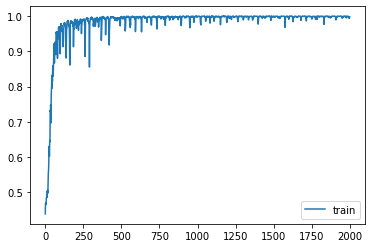

In [18]:
df = pd.read_csv('Dataset.csv')
df = signal_to_catagorical(df)
df = df[30:]
x_train = df[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
x_train = add_shift_day(x_train,30)
y_train = df['Signal']
y_train = to_categorical(y_train)
y_train = y_train.tolist()
del y_train[0:30]
y_train = np.array(y_train)

# r = random.randint(0,2)
# val = val_list[1]
# val = signal_to_catagorical(val)
# x_val = val[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
# x_val = add_shift_day(x_val,30)
# y_val = val['Signal']
# y_val = to_categorical(y_val)
# y_val = y_val.tolist()
# del y_val[0:30]
# y_val = np.array(y_val)

h = model.fit(x_train, y_train, epochs=2000,shuffle=False)
model.save('model_lstm_data5_2000ep.h5')
plt.plot(h.history['acc'])
plt.legend(['train'])
plt.show()


In [5]:
model = load_model('model_lstm_data5.h5')

In [19]:
for test in test_list:
    # print(test)
    test = signal_to_catagorical(test)
    #   print(test)
    x_test = test[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
    x_test = add_shift_day(x_test,30)
    y_test = test['Signal'].values
    y_test = y_test.tolist()
    del y_test[0:30]
    y_test = np.array(y_test)

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred,axis = -1)
    y_test = y_test.astype('int64')
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print(cm)

    
  

Confusion Matrix
[[ 165   44  300]
 [  35  108  167]
 [ 405  231 1152]]
Confusion Matrix
[[221  55 205]
 [153 141 121]
 [572 563 621]]


C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jame_\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Text(0.5, 0, 'Date')

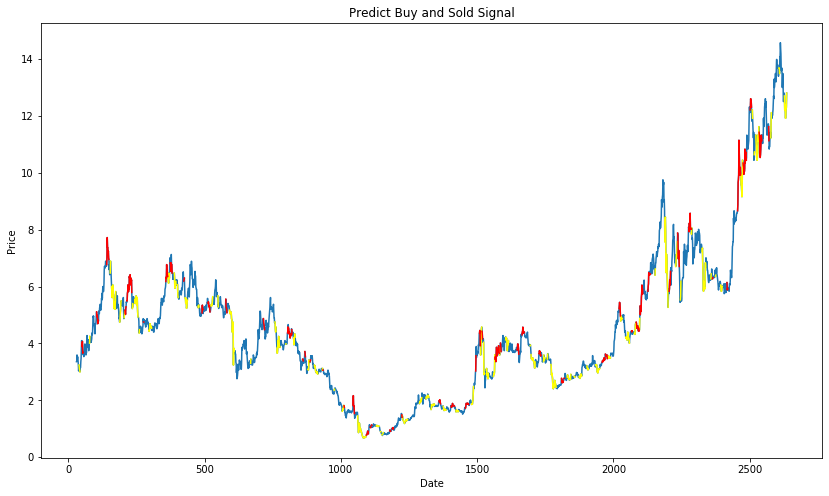

In [20]:
p_test = test_list[0]
p_test = signal_to_catagorical(p_test)
x_test = p_test[['MACD-SL-1_n','DMI_n','MACD-SL-2_n','Close_n','AO_n','RSI_n','MA-trend']].values
x_test = add_shift_day(x_test,30)
y_test = p_test['Signal'].values
y_test = y_test.tolist()
del y_test[0:30]
y_test = np.array(y_test)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = -1)
p_test = p_test.iloc[30:]

p_test['pred'] = y_pred
p_test['pred_b'] = np.where(p_test['pred'] == 0,p_test['Close'],np.nan)
p_test['pred_s'] = np.where(p_test['pred'] == 1,p_test['Close'],np.nan)

plt.figure(figsize=(14,8))
# plt.grid()
plt.title('Predict Buy and Sold Signal')
plt.plot(p_test['Close'])
plt.plot(p_test['pred_b'],color='yellow')
plt.plot(p_test['pred_s'],color='red')
plt.ylabel('Price')
plt.xlabel('Date')